In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [2]:
X = 6 * np.random.rand(200,1)-3
y = 0.8*X**2 + 0.9*X + 2 + np.random.randn(200,1)

#y=2+ 0.9X+0.8X^2+noise

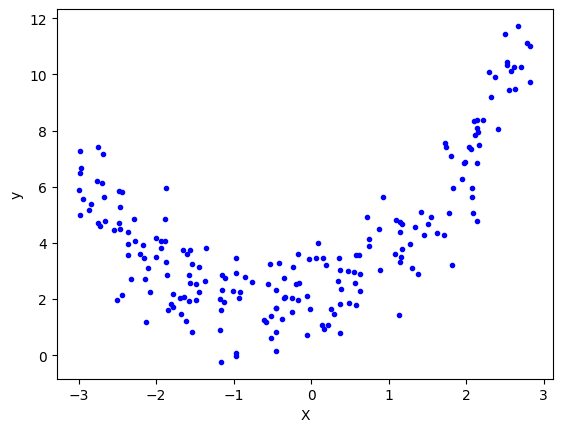

In [3]:
plt.plot(X,y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [4]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [5]:
# Applying the Linear Regression model

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [6]:
y_pred = lr.predict(X_test)
r2_score_lr = r2_score(y_test, y_pred)
print("R2-score is: ", r2_score_lr)

R2-score is:  0.21272455520216005


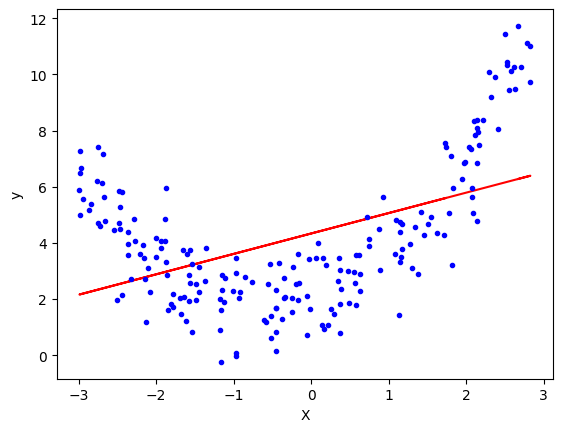

In [8]:
plt.plot(X_train, lr.predict(X_train), color='r')
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

#### **Applying Polynomial Linear Regression**

In [9]:
poly = PolynomialFeatures(degree=2, include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [10]:
print(X_train[0])

[1.73516415]


In [11]:
print(X_train_trans[0])

[1.         1.73516415 3.01079463]


In [13]:
lr = LinearRegression()
lr.fit(X_train_trans, y_train)

LinearRegression()

In [14]:
y_pred = lr.predict(X_test_trans)

In [15]:
r2_score(y_test,y_pred)

0.7878185959946564

In [16]:
print(lr.coef_)

[[0.         0.89575767 0.80679482]]


In [17]:
print(lr.intercept_)

[1.97206328]


In [23]:
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

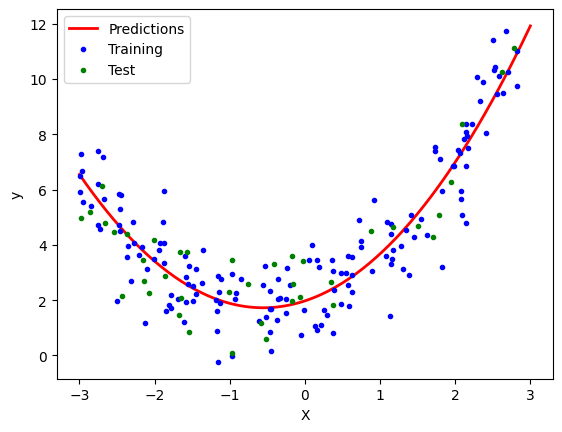

In [25]:
plt.plot(X_new,y_new, "r-", linewidth=2,label='Predictions')
plt.plot(X_train,y_train, "b.",label='Training')
plt.plot(X_test,y_test, "g.",label='Test')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [26]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

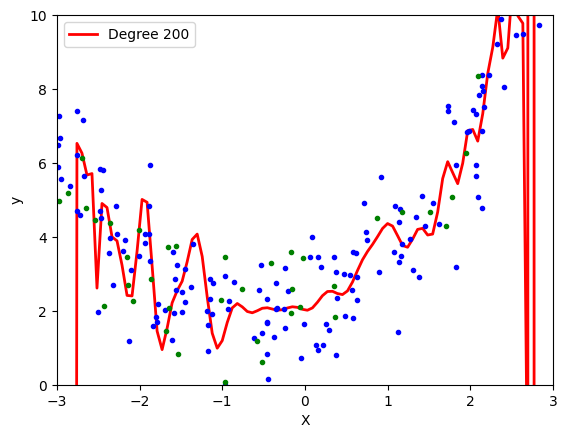

In [29]:
polynomial_regression(200)

In [30]:
poly.powers_

array([[0],
       [1],
       [2]])

#### **Visualize the data using a 3-d plot**

In [32]:
# 3D polynomial regression

x = 7*np.random.rand(100,1)-2.8
y = 7*np.random.rand(100,1)-2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y + 2 + np.random.rand(100,1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [33]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df,x=x.ravel(), y=y.ravel(), z = z.ravel())
fig.show()